**Install dependencies**

In [1]:
# %%capture
# # Install the latest versions of the Pillow, fastai, numpy, pandas, and kaggle packages
# !pip install -U Pillow
# !pip install -U fastai
# !pip install -U numpy
# !pip install -U pandas
# !pip install -U kaggle

**Import dependencies**

In [2]:
# Import the random, pathlib, and PIL modules
import random
from pathlib import Path
from PIL import Image

# Import the get_image_files function from the fastai vision module
from fastai.vision.all import get_image_files

# Import the pandas package
import pandas as pd

# Set the max column width to None
pd.set_option('max_colwidth', None)

# Set the max number of rows and columns to None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Enter Kaggle username and API token**

In [3]:
creds = '{"username":"","key":""}'

**Save Kaggle credentials if none are present**


* **Source:** [https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb](https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb)

In [4]:
# Set the path to the kaggle.json file
cred_path = Path('~/.kaggle/kaggle.json').expanduser()

# Check if the file already exists
if not cred_path.exists():
    # Create the directory if it does not exist
    cred_path.parent.mkdir(exist_ok=True)
    # Save the API key to the file
    cred_path.write_text(creds)
    # Set the file permissions to be readable and writable by the current user
    cred_path.chmod(0o600)

**Import Kaggle API**

In [5]:
# Import the API module from the kaggle package
from kaggle import api

**Define path to dataset**

In [6]:
# Import the URLs object from the fastai.data.external module
from fastai.data.external import URLs

In [7]:
# Set the name of the dataset
dataset_name = 'pexels-110k-512p-min-jpg'
# dataset_name = 'pexels-110k-768p-min-jpg'

# Construct the Kaggle dataset name by combining the username and dataset name
kaggle_dataset = f'innominate817/{dataset_name}'

# Get the path to the directory where datasets are stored
archive_dir = URLs.path()

# Create the path to the data directory
dataset_dir = archive_dir/'../data'

# Create the path to the zip file that contains the dataset
archive_path = Path(f'{archive_dir}/{dataset_name}.zip')

# Create the path to the directory where the dataset will be extracted
dataset_path = Path(f'{dataset_dir}/{dataset_name}')

**Define method to extract the dataset from an archive file**

In [8]:
import zipfile
import tarfile

def file_extract(fname, dest=None):
    """
    Extract the specified file to the destination directory using `tarfile` or `zipfile`.
    
    Args:
        fname (str): The path to the file to be extracted.
        dest (str): The path to the directory where the file will be extracted. If not specified, the file will be extracted to the same directory as the source file.
        
    Returns:
        None
        
    Raises:
        Exception: If the file has an unrecognized file extension.
    """
    # Set the destination directory to the parent directory of the file if not specified
    if dest is None: dest = Path(fname).parent
    
    # Convert the file path to a string
    fname = str(fname)
    
    # Check the file extension and extract the file using the appropriate module
    if fname.endswith('gz'):
        tarfile.open(fname, 'r:gz').extractall(dest)
    elif fname.endswith('zip'):
        zipfile.ZipFile(fname).extractall(dest)
    else:
        raise Exception(f'Unrecognized archive: {fname}')

**Download the dataset if it is not present**

In [9]:
# Set the delete_archive flag to True to delete the archive after extraction
delete_archive = True

# Check if the dataset_path exists
if not dataset_path.exists():
    # Download the dataset from Kaggle to the archive directory
    api.dataset_download_cli(kaggle_dataset, path=archive_dir)
    
    # Extract the dataset from the downloaded archive
    file_extract(fname=archive_path, dest=dataset_dir)
    
    # If delete_archive is True, delete the archive
    if delete_archive: archive_path.unlink()
else:
    print("Dataset already downloaded")

Dataset already downloaded


**Define path to image attribute data**

In [10]:
# Set the file path for the attributes dataframe
attributes_df_json_file = Path(dataset_path/'attributes_df.json')

# Print the file path
print(attributes_df_json_file)

/home/innom-dt/.fastai/archive/../data/pexels-110k-512p-min-jpg/attributes_df.json


**Import image attributes**

In [11]:
# Read the attributes dataframe from the JSON file
attributes_df = pd.read_json(attributes_df_json_file)

# Print the number of entries in the dataframe
print(f"Number of entries: {len(attributes_df)}")

# Display the first few rows of the dataframe
attributes_df.head().transpose()

Number of entries: 110715


,3186010,3185509,3182800,3184308,3185747
title,Pink and White Ice Cream Neon Signage,Garnishing of Syrup on a Cheesecake,People in Front of the Computers,Photo Of People Next To Each Other,Aerial View of Coconut Trees at Rural Area
aspect_ratio,0.749809,1.0,1.498501,1.5,1.499795
main_color,"[128, 38, 77]","[185, 167, 164]","[176, 175, 169]","[201, 179, 150]","[154, 139, 128]"
colors,"[#000000, #a52a2a, #bc8f8f, #c71585, #d02090, #d8bfd8]","[#000000, #696969, #bc8f8f, #cd5c5c, #d3d3d3]","[#000000, #696969, #a9a9a9, #add8e6, #f5f5f5]","[#708090, #a0522d, #cd853f, #eedd82, #ffdab9]","[#696969, #808080]"
tags,"[bright, chocolate, close-up, cold, cream, creamy, cup, dairy product, delicious, design, dessert, electricity, epicure, flavors, fluorescent, food, food photography, goody, hand, ice cream, icecream, illuminated, indulgence, light pink background, neon, neon lights, neon sign, pastry, pink background, pink wallpaper, scoop, sweet, sweets, tasty]","[cheesecake, dessert, epicure, food photography, food plating, food porn, food preparation, food styling, garnishing, gastronomy, glaze, syrup]","[colleagues, computer, connection, cooperation, desk, dreadlocks, employees, facial expression, furniture, indoors, internet, looking, office, people, room, sit, sitting, table, teamwork, technology, women, work, working, workplace]","[adults, casual, communication, conversation, fashion, fashionable, fun, gather, gathered, gathering, happiness, happy, leisure, outfit, recreation, sit, sitting, smile, smiling, style, stylish, wear]","[aerial shot, coconut trees, daylight, drone shot, exotic, high angle shot, outdoors, palm trees, sand, summer, trees, tropical]"
adult,very_unlikely,very_unlikely,unlikely,unlikely,None
aperture,1.8,NaN,NaN,NaN,2.6
camera,iPhone X,,None,None,FC1102
focal_length,4.0,NaN,NaN,NaN,4.49
google_place_id,ChIJkUjxJ7it1y0R4qOVTbWHlR4,None,None,None,None


**Get only image titles**

In [12]:
# Create a dataframe of the 'title' column from the attributes dataframe
title_df = attributes_df['title'].to_frame()

# Display the first few rows of the dataframe
title_df.head()

,title
3186010,Pink and White Ice Cream Neon Signage
3185509,Garnishing of Syrup on a Cheesecake
3182800,People in Front of the Computers
3184308,Photo Of People Next To Each Other
3185747,Aerial View of Coconut Trees at Rural Area


**Get image ids**

In [13]:
# Create a list of the indexes of the attributes dataframe
img_ids = attributes_df.index.to_list()

# Print the first index from the list
print(img_ids[0])

3186010


**Define path to image dataset**

In [14]:
# Set the path for the images directory
img_dir = Path(dataset_path/"images/")

**Get image file paths**

In [15]:
# Get a list of the paths to the images in the images directory
img_paths = get_image_files(img_dir)

# Print the number of images in the images directory
print(len(img_paths))

110715


**Create image path dictionary**

In [16]:
# Create a dictionary mapping image IDs to image paths
img_path_dict = {path.stem.split('-')[-1] : path for path in img_paths}

# Display the first few entries in the dictionary using a Pandas Dataframe
pd.DataFrame.from_dict(img_path_dict, orient='index').head()

,0
974407,/home/innom-dt/.fastai/archive/../data/pexels-110k-512p-min-jpg/images/color-environment-round-out-974407.jpg
1448167,/home/innom-dt/.fastai/archive/../data/pexels-110k-512p-min-jpg/images/blue-sky-landscape-mothernature-1448167.jpg
2568504,/home/innom-dt/.fastai/archive/../data/pexels-110k-512p-min-jpg/images/asian-asian-food-blur-2568504.jpg
3114475,/home/innom-dt/.fastai/archive/../data/pexels-110k-512p-min-jpg/images/3114475.jpg
2478329,/home/innom-dt/.fastai/archive/../data/pexels-110k-512p-min-jpg/images/aroma-background-blurred-background-2478329.jpg


**Select an image ID**

In [17]:
# Choose a random image ID from the list of image IDs
img_id = random.choice(img_ids)
# img_id = img_ids[0]

# Print the selected image ID
print(img_id)

1898555


**Inspect a sample image**

Title: Woman Waving Hair


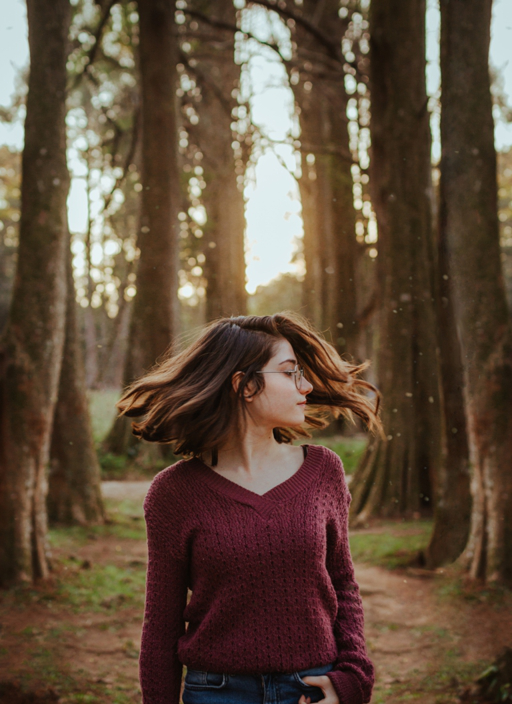

In [18]:
# Open the image located at the path in the img_path_dict with the key of the current img_id
sample_img = Image.open(img_path_dict[str(img_id)])

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[img_id]['title']}")

# Display the image
sample_img

**Inspect tags for selected image**

In [19]:
# Retrieve the list of tags for the current image (identified by img_id)
# from the 'tags' column in the attributes_df dataframe
attributes_df.loc[img_id]['tags']

['attractive',
 'beautiful',
 'beauty',
 'casual',
 'close-up',
 'colors',
 'daylight',
 'daytime',
 'face',
 'facial expression',
 'fashion',
 'fashionable',
 'female',
 'girl',
 'grass',
 'hair',
 'hairstyle',
 'hands',
 'human',
 'lady',
 'landscape',
 'lips',
 'model',
 'nature',
 'outdoors',
 'park',
 'person',
 'photoshoot',
 'pose',
 'posing',
 'pretty',
 'profile picture',
 'skin',
 'trees',
 'wear',
 'woman',
 'woods',
 'young',
 'youth']

**Search dataset for a specific tag**

In [20]:
# Define the search term
tag_term = 'golden hour'

# Create a mask for the attributes_df dataframe to identify rows where the 'tags' column contains the search term
mask = attributes_df.tags.apply(lambda x: tag_term in x if x is not None else False)

# Create a new dataframe containing only the rows that match the mask
results_df = attributes_df[mask]

# Print the number of rows in the resulting dataframe
print(f"Found {len(results_df)} entries")

# Display the first few rows of the resulting dataframe
results_df.head().transpose()

Found 1316 entries


,3157917,3150702,3157967,3170887,3163677
title,Photo Of Sunset During Dawn,Aerial Photography of City Buildings During Golden Hour,Calm Sea During Golden Hour,Photo of Trees During Golden Hour,Photo Of People In Front Of Mosque During Golden Hour
aspect_ratio,1.333234,0.669421,1.5,0.666667,1.509804
main_color,"[152, 118, 96]","[137, 102, 94]","[119, 107, 97]","[142, 140, 132]","[189, 145, 91]"
colors,"[#000000, #deb887, #e9967a]","[#000000, #696969, #ff7f50, #ffa07a]","[#000000, #faebd7]","[#000000, #dcdcdc]","[#8b4513, #deb887, #faebd7]"
tags,"[afterglow, calm, dawn, dusk, environment, golden hour, horizon, idyllic, nature, nature photography, ocean, peaceful, ripples, scenery, scenic, sea, seascape, sun, sunbeam, sunrise, sunset, tranquil]","[city, dawn, dusk, fog, foggy, golden hour, hills, morning, scenery, scenic, silhouette, sky, sunrise, sunset, urban, view]","[clouds, dawn, dusk, golden hour, horizon, islands, ocean, outdoors, rock formation, sea, seashore, shore, sky, sunrise, sunset, travel, water]","[dawn, dusk, environment, forest, golden hour, horizon, nature, outdoors, scenery, trees, woods]","[arches, architectural building, architectural design, architectural detail, architecture, belief, blue mosque, building, celebration, crowd, crowded, culture, dawn, daylight, delhi, domes, dusk, eid, exterior, faith, gathering, golden hour, grand mosque, historic, historical building, house of worship, islam, islamic architecture, jama, landmark, masjid, minarets, monument, mosque, muslim, muslims, outdoors, people, pillars, prayers, praying, ramadan, religion, religious, sacred, salah, sheikh zayed mosque, spirituality, square, sultan ahmed mosque, sun, sunbeam, sunlight, sunrays, sunrise, sunset, sunshine, temple, towers, tradition, traditional, travel, trust, turning point, worship]"
adult,very_unlikely,very_unlikely,very_unlikely,None,very_unlikely
aperture,1.7,5.6,7.1,1.8,11.0
camera,ONEPLUS A6013,NIKON D3000,Canon EOS 6D,Canon EOS Kiss X7,NIKON D7000
focal_length,4.25,70.0,30.0,50.0,18.0
google_place_id,ChIJCxgesixFDhMR0oAyeQNvqig,None,None,None,None


**Get image IDs from search results**

In [21]:
# Retrieve a list of the image IDs for the entries in the results_df dataframe
results_df_img_ids = results_df.index.to_list()

# Print the first image ID in the list
print(results_df_img_ids[0])

3157917


**Select an image ID**

In [22]:
# Choose a random image ID from the list of image IDs in the results_df dataframe
results_img_id = random.choice(results_df_img_ids)

# Print the chosen image ID
print(results_img_id)

2128112


**Inspect an image from the search results**

Title: Brown Buildings Near River


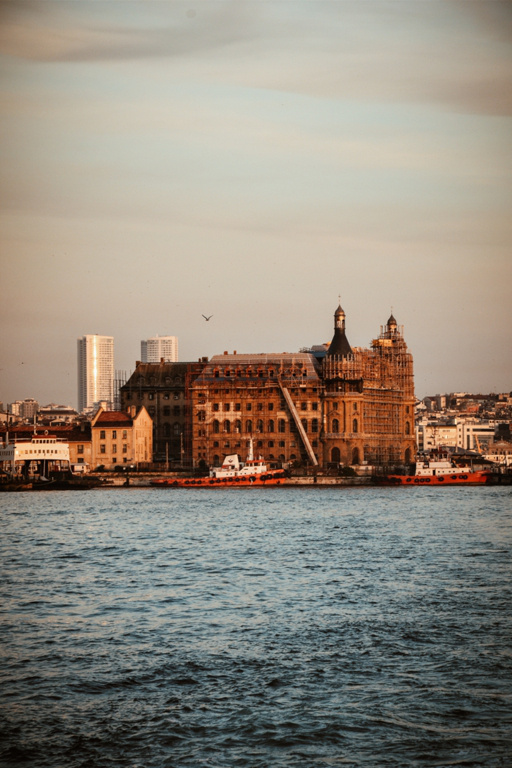

In [23]:
# Open the image located at the path in the img_path_dict with the key of the current results_img_id
sample_img = Image.open(img_path_dict[str(results_img_id)])

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[results_img_id]['title']}")

# Display the image
sample_img